In [1]:
from tdmclient import ClientAsync
from local_navigation import localNavigation
from global_navigation import GlobalNavigation

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 6ca1ca45-4524-41eb-8cc4-fb023f64b9d0

In [2]:
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

In [ ]:
#create vision module object
visio = Vision()
visio.begin(show_which=[1,1,1,1])

Caméra initialisée sur le port 0


no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camera

In [ ]:
visio.stop() #stop the visio module

In [ ]:
t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need
print(o)
print(g)
print(t)

[[[289, 278], [432, 292], [361, 187]], [[117, 0], [114, 72], [235, 118], [265, 54], [255, 0]]]
[128.73245, 232.91843]
[519.2968, 236.80212, -1.4570043]


[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Def

In [5]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)
local_navigation = localNavigation()


# # Get the initial value of our thymio，goal and obstacles
# thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles()
# thymio_x, thymio_y, theta = thymio
# start = (thymio_x, thymio_y)
# # Get the desired goal list from the vision module
# goal_list = global_navigation.dijkstra(start, goal, obstacles)
# # Delete the start point
# goal_list.pop(0)
# goal_point = goal_list[0]
# 
# try:
#     while True:
#         # Vous pouvez exécuter d'autres tâches en parallèle ici
#         # Le programme principal continue de tourner sans bloquer l'affichage
#         motion_control.obstacle_avoidance()
#         if motion_control.path_tracking(thymio, goal_point):
#             if goal_list:
#                 goal_list.pop(0)
#                 goal_point = goal_list[0]
#             else:
#                 break
#         thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles() 
#         print("Le programme principal fonctionne en arrière-plan...")
#         time.sleep(1)
# except KeyboardInterrupt:
#     print("Arrêt du programme demandé.")
# finally:
#     camera_thread.stop()
#     camera_thread.join()
#     print("Programme terminé.")

[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Def

[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all


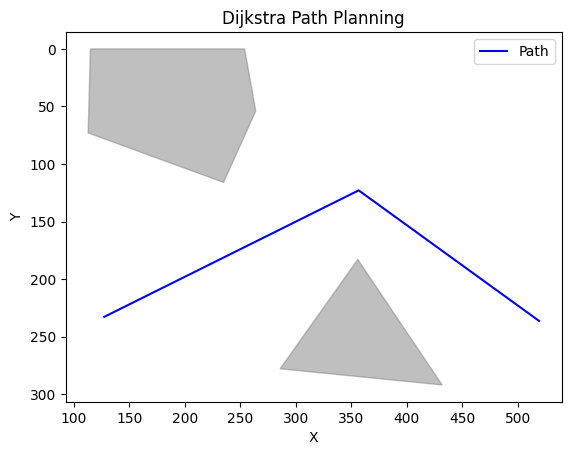

[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Def

In [ ]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()

path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
if path:
    global_nav.plot_path(path, obstacles)
else:
    print("No valid path found. Cannot plot.")

In [ ]:
print(path)

[(546.5473022460938, 210.383056640625), (361.9276916120761, 123.51016827906797), (84.43888854980469, 182.94635009765625)]


[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Defaulting to show all
[Vision.camerafeed.run()] List of videofeeds must be 6, not 4.Def

In [8]:
path.pop(0)
goal_point = path[0]
glob_loc = 0
speed = [0,0]

try:
    while True:
        prox_horizontal = motion_control.read_prox_sensors()
        glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
        print(prox_horizontal)
        print(glob_loc)
       
        if(glob_loc == 0):
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if motion_control.path_tracking(thymio, goal_point):
                path.pop(0)
                if not path:
                    motion_control.set_motor_speed(0, 0)
                    break
                else:
                    goal_point = path[0]
            thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        if(glob_loc == 1):
            y = motion_control.get_motor_speed()
            speed = local_navigation.reactive_control(prox_horizontal, y)
            motion_control.set_motor_speed(speed[0], speed[1])
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if(glob_loc == 0):
                thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
    print("ARRIVED")



except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program stops")

IndexError: list index out of range

In [9]:
motion_control.set_motor_speed(0, 0)
#test

In [7]:
prox_horizontal = motion_control.read_prox_sensors()
print(prox_horizontal)

[0, 0, 0, 0, 0, 0, 0]
